In [35]:
import numpy as np
import pandas as pd
#using sample generators from scikit-learn.
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report,  balanced_accuracy_score
from mlxtend.plotting import plot_decision_regions

from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_decision_regions
from imblearn.under_sampling import RandomUnderSampler



In [17]:
# Generate balanced dataset using make_moons
X_moons_balanced, y_moons_balanced = make_moons(n_samples=300, noise=0.2, random_state=42)

# Generate balanced dataset using make_circles
X_circles_balanced, y_circles_balanced = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

# Create an imbalanced version of the make_circles dataset by keeping only 30% of class 1
mask = np.random.rand(300) > 0.7  # Keep only 30% of class 1
X_circles_imbalanced = X_circles_balanced[mask | (y_circles_balanced == 0)]
y_circles_imbalanced = y_circles_balanced[mask | (y_circles_balanced == 0)]



In [39]:
X_circles_imbalanced.shape

(195, 2)

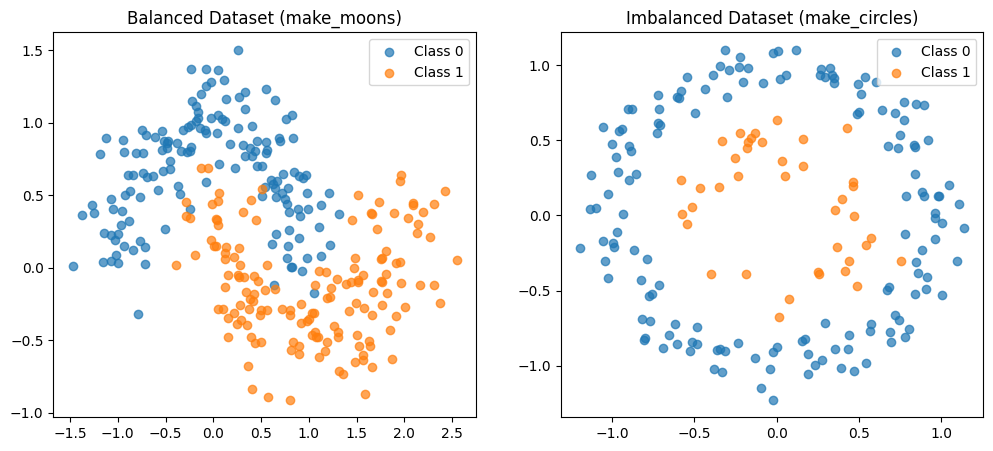

In [13]:
# Plot the datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Balanced dataset plot (make_moons)
axes[0].scatter(X_moons_balanced[y_moons_balanced == 0, 0], X_moons_balanced[y_moons_balanced == 0, 1], label="Class 0", alpha=0.7)
axes[0].scatter(X_moons_balanced[y_moons_balanced == 1, 0], X_moons_balanced[y_moons_balanced == 1, 1], label="Class 1", alpha=0.7)
axes[0].set_title("Balanced Dataset (make_moons)")
axes[0].legend()

# Imbalanced dataset plot (make_circles)
axes[1].scatter(X_circles_imbalanced[y_circles_imbalanced == 0, 0], X_circles_imbalanced[y_circles_imbalanced == 0, 1], label="Class 0", alpha=0.7)
axes[1].scatter(X_circles_imbalanced[y_circles_imbalanced == 1, 0], X_circles_imbalanced[y_circles_imbalanced == 1, 1], label="Class 1", alpha=0.7)
axes[1].set_title("Imbalanced Dataset (make_circles)")
axes[1].legend()

plt.show()

Balanced Moons Dataset:
Accuracy: 0.9
Balanced Accuracy: 0.8981900452488687
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.91      0.91      0.91        68

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



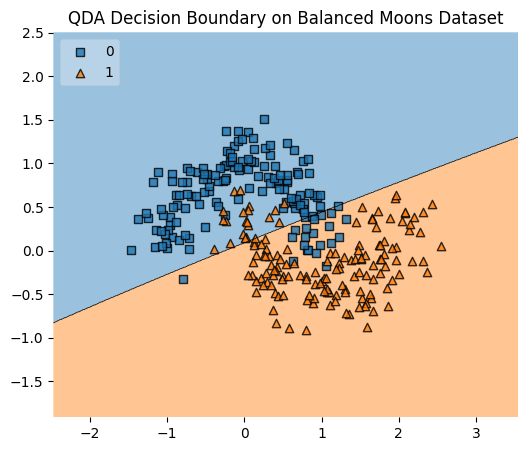

Imbalanced Circles Dataset:
Accuracy: 0.9743589743589743
Balanced Accuracy: 0.9836065573770492
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.89      1.00      0.94        17

    accuracy                           0.97        78
   macro avg       0.95      0.98      0.96        78
weighted avg       0.98      0.97      0.97        78



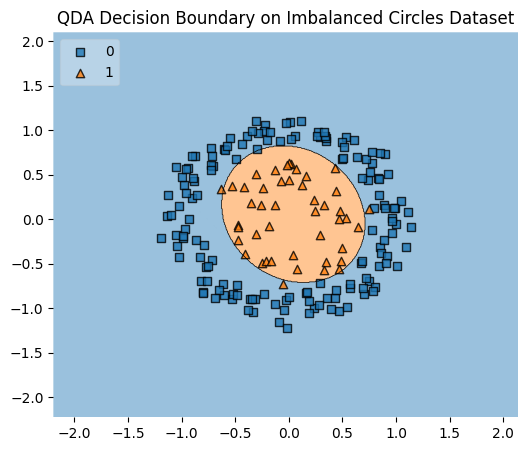

In [27]:
# Split datasets into train and test sets (40% test data)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons_balanced, y_moons_balanced, test_size=0.4, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles_imbalanced, y_circles_imbalanced, test_size=0.4, random_state=42)

# Train a QuadraticDiscriminantAnalysis classifier with balanced priors
qda = QuadraticDiscriminantAnalysis(priors=[0.5, 0.5])

# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(6, 5))
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, legend=2)
    plt.title(title)
    plt.show()

# Train and evaluate on balanced dataset
qda.fit(X_train_moons, y_train_moons)
y_pred_moons = qda.predict(X_test_moons)
print("Balanced Moons Dataset:")
print("Accuracy:", accuracy_score(y_test_moons, y_pred_moons))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_moons, y_pred_moons))
print(classification_report(y_test_moons, y_pred_moons))
plot_decision_boundary(X_moons_balanced, y_moons_balanced, qda, "QDA Decision Boundary on Balanced Moons Dataset")

# Train and evaluate on imbalanced dataset
qda.fit(X_train_circles, y_train_circles)
y_pred_circles = qda.predict(X_test_circles)
print("Imbalanced Circles Dataset:")
print("Accuracy:", accuracy_score(y_test_circles, y_pred_circles))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_circles, y_pred_circles))
print(classification_report(y_test_circles, y_pred_circles))
plot_decision_boundary(X_circles_imbalanced, y_circles_imbalanced, qda, "QDA Decision Boundary on Imbalanced Circles Dataset")

Oversampled Circles Dataset:
Accuracy: 0.9871794871794872
Balanced Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.94      0.97        16

    accuracy                           0.99        78
   macro avg       0.99      0.97      0.98        78
weighted avg       0.99      0.99      0.99        78



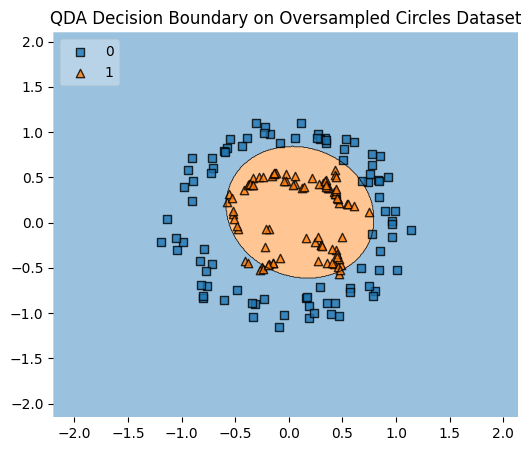

In [33]:
# Apply SMOTE oversampling to balance the imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_circles_resampled, y_train_circles_resampled = smote.fit_resample(X_train_circles, y_train_circles)

# Train a QuadraticDiscriminantAnalysis classifier with balanced priors
qda = QuadraticDiscriminantAnalysis(priors=[0.5, 0.5])

# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(6, 5))
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, legend=2)
    plt.title(title)
    plt.show()



# Train and evaluate on oversampled dataset
qda.fit(X_train_circles_resampled, y_train_circles_resampled)
y_pred_circles = qda.predict(X_test_circles)
print("Oversampled Circles Dataset:")
print("Accuracy:", accuracy_score(y_test_circles, y_pred_circles))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_circles, y_pred_circles))
print(classification_report(y_test_circles, y_pred_circles))
plot_decision_boundary(X_train_circles_resampled, y_train_circles_resampled, qda, "QDA Decision Boundary on Oversampled Circles Dataset")

Undersampled Circles Dataset:
Accuracy: 0.9358974358974359
Balanced Accuracy: 0.9596774193548387
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        62
           1       0.76      1.00      0.86        16

    accuracy                           0.94        78
   macro avg       0.88      0.96      0.91        78
weighted avg       0.95      0.94      0.94        78



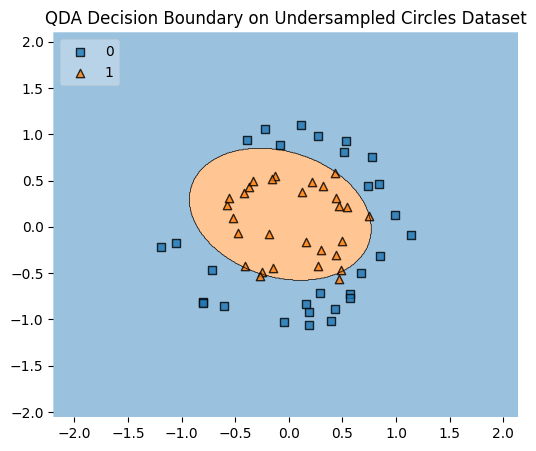

In [32]:
# Apply undersampling to balance the imbalanced dataset
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_circles_undersampled, y_train_circles_undersampled = undersample.fit_resample(X_train_circles, y_train_circles)


# Train and evaluate on undersampled dataset
qda.fit(X_train_circles_undersampled, y_train_circles_undersampled)
y_pred_circles_undersampled = qda.predict(X_test_circles)
print("Undersampled Circles Dataset:")
print("Accuracy:", accuracy_score(y_test_circles, y_pred_circles_undersampled))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_circles, y_pred_circles_undersampled))
print(classification_report(y_test_circles, y_pred_circles_undersampled))
plot_decision_boundary(X_train_circles_undersampled, y_train_circles_undersampled, qda, "QDA Decision Boundary on Undersampled Circles Dataset")


Using RandomUnderSampler , we have seen accuracy has been improved. 